## Telecom Churn Case Study
With 21 predictor variables we need to predict whether a particular customer will switch to another telecom provider or not. In telecom terminology, this is referred to as churning and not churning, respectively.

### Importing and Merging Data

In [1]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np

In [2]:
# Importing all datasets
churn_data = pd.read_csv("churn_data.csv")
customer_data = pd.read_csv("customer_data.csv")
internet_data = pd.read_csv("internet_data.csv")

In [3]:
#Merging on 'customerID'
df_1 = pd.merge(churn_data,customer_data , how='inner', on ='customerID' )

In [4]:
#Final dataframe with all predictor variables
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

### Let's understand the structure of our dataframe

In [5]:
# Let's see the head of our master dataset
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [7]:
# Let's see the type of each column
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   Churn             7043 non-null   object 
 9   gender            7043 non-null   object 
 10  SeniorCitizen     7043 non-null   int64  
 11  Partner           7043 non-null   object 
 12  Dependents        7043 non-null   object 
 13  MultipleLines     7043 non-null   object 
 14  InternetService   7043 non-null   object 
 15  OnlineSecurity    7043 non-null   object 
 16  OnlineBackup      7043 non-null   object 


### Data Preparation

After creating a merged master data set, one that contains all 21 variables, data preparation will be done, which involves the following steps:

Missing value imputation

Outlier treatment

Standardising scales of continuous variables

Dummy variable creation for categorical variables

In [8]:
# Converting Yes to 1 and No to 0

telecom['PhoneService'] = telecom['PhoneService'].map({'Yes':1, 'No':0 })
telecom['PaperlessBilling'] = telecom['PaperlessBilling'].map({'Yes': 1, 'No': 0})
telecom['Churn'] = telecom['Churn'].map({'Yes': 1, 'No': 0})
telecom['Partner'] = telecom['Partner'].map({'Yes': 1, 'No': 0})
telecom['Dependents'] = telecom['Dependents'].map({'Yes': 1, 'No': 0})

In [9]:
telecom.head(10)

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,0,0,No,Fiber optic,No,No,No,No,No,No
5,9305-CDSKC,8,1,Month-to-month,1,Electronic check,99.65,820.5,1,Female,...,0,0,Yes,Fiber optic,No,No,Yes,No,Yes,Yes
6,1452-KIOVK,22,1,Month-to-month,1,Credit card (automatic),89.10,1949.4,0,Male,...,0,1,Yes,Fiber optic,No,Yes,No,No,Yes,No
7,6713-OKOMC,10,0,Month-to-month,0,Mailed check,29.75,301.9,0,Female,...,0,0,No phone service,DSL,Yes,No,No,No,No,No
8,7892-POOKP,28,1,Month-to-month,1,Electronic check,104.80,3046.05,1,Female,...,1,0,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes
9,6388-TABGU,62,1,One year,0,Bank transfer (automatic),56.15,3487.95,0,Male,...,0,1,No,DSL,Yes,Yes,No,No,No,No


### Dummy Variable Creation

In [10]:
# Creating a dummy variable for the variable 'Contract' and dropping the first one.
cont = pd.get_dummies(telecom['Contract'],prefix='Contract',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,cont],axis=1)

# Creating a dummy variable for the variable 'PaymentMethod' and dropping the first one.
pm = pd.get_dummies(telecom['PaymentMethod'],prefix='PaymentMethod',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,pm],axis=1)

# Creating a dummy variable for the variable 'gender' and dropping the first one.
gen = pd.get_dummies(telecom['gender'],prefix='gender',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,gen],axis=1)

# Creating a dummy variable for the variable 'MultipleLines' and dropping the first one.
ml = pd.get_dummies(telecom['MultipleLines'],prefix='MultipleLines')
#  dropping MultipleLines_No phone service column
ml1 = ml.drop(['MultipleLines_No phone service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ml1],axis=1)

# Creating a dummy variable for the variable 'InternetService' and dropping the first one.
iser = pd.get_dummies(telecom['InternetService'],prefix='InternetService',drop_first=True)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,iser],axis=1)

# Creating a dummy variable for the variable 'OnlineSecurity'.
os = pd.get_dummies(telecom['OnlineSecurity'],prefix='OnlineSecurity')
os1= os.drop(['OnlineSecurity_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,os1],axis=1)

# Creating a dummy variable for the variable 'OnlineBackup'.
ob =pd.get_dummies(telecom['OnlineBackup'],prefix='OnlineBackup')
ob1 =ob.drop(['OnlineBackup_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ob1],axis=1)

# Creating a dummy variable for the variable 'DeviceProtection'. 
dp =pd.get_dummies(telecom['DeviceProtection'],prefix='DeviceProtection')
dp1 = dp.drop(['DeviceProtection_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,dp1],axis=1)

# Creating a dummy variable for the variable 'TechSupport'. 
ts =pd.get_dummies(telecom['TechSupport'],prefix='TechSupport')
ts1 = ts.drop(['TechSupport_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,ts1],axis=1)

# Creating a dummy variable for the variable 'StreamingTV'.
st =pd.get_dummies(telecom['StreamingTV'],prefix='StreamingTV')
st1 = st.drop(['StreamingTV_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,st1],axis=1)

# Creating a dummy variable for the variable 'StreamingMovies'. 
sm =pd.get_dummies(telecom['StreamingMovies'],prefix='StreamingMovies')
sm1 = sm.drop(['StreamingMovies_No internet service'],1)
#Adding the results to the master dataframe
telecom = pd.concat([telecom,sm1],axis=1)

In [11]:
telecom['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [12]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,...,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,...,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,...,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,...,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,...,1,0,1,0,1,0,1,0,1,0


### Dropping the repeated variables

In [13]:
# We have created dummies for the below variables, so we can drop them
telecom = telecom.drop(['Contract','PaymentMethod','gender','MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [14]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [15]:
#The 'TotalCharges' varaible was imported as a string we need to convert it to float

telecom['TotalCharges']=pd.to_numeric(telecom['TotalCharges'], errors='coerce').fillna(0, downcast='infer')

In [16]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

Now we can see we have all variables as integer.

### Checking for Outliers

In [17]:
# Checking for outliers in the continuous variables
num_telecom = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [18]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
num_telecom.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
90%,69.000000,102.600000,5973.690000
95%,72.000000,107.400000,6921.025000
99%,72.000000,114.729000,8039.256000


From the distribution shown above, you can see that ,there is no outlier in data. The numbers are gradually increasing.

### Checking for Missing Values and Inputing Them

In [19]:
# Adding up the missing values (column-wise)
telecom.isnull().sum()

customerID                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
gender_Male                              0
MultipleLines_No                         0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No                        0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBacku

In [20]:
# Checking the percentage of missing values
# round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

In [21]:
# Removing NaN TotalCharges rows
# telecom = telecom[~np.isnan(telecom['TotalCharges'])]

In [22]:
# Checking percentage of missing values after removing the missing values
# round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

Now we don't have any missing values

### Feature Standardisation

In [23]:
# Normalising continuous features
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [24]:
normalized_df=(df-df.mean())/df.std()

In [25]:
telecom = telecom.drop(['tenure','MonthlyCharges','TotalCharges'], axis=1)

In [26]:
telecom = pd.concat([telecom,normalized_df],axis=1)

In [27]:
telecom

,customerID,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),...,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.277354,-1.160241,-0.992540
1,5575-GNVDE,1,0,0,0,0,0,1,0,0,...,1,1,0,1,0,1,0,0.066323,-0.259611,-0.172152
2,3668-QPYBK,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.236636,-0.362635,-0.957998
3,7795-CFOCW,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,1,0,0.514215,-0.746482,-0.193659
4,9237-HQITU,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,1,0,-1.236636,0.197351,-0.938808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,1,0,0,1,1,1,0,0,...,1,0,1,0,1,0,1,-0.340852,0.665945,-0.127596
7039,2234-XADUH,1,1,0,0,1,1,1,0,1,...,1,1,0,0,1,0,1,1.613587,1.277443,2.242447
7040,4801-JZAZL,0,1,0,0,1,1,0,0,0,...,0,1,0,1,0,1,0,-0.870179,-1.168549,-0.852871
7041,8361-LTMKD,1,1,1,1,1,0,0,0,0,...,0,1,0,1,0,1,0,-1.155201,0.320315,-0.870451


### Checking the Churn Rate

In [28]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [29]:
churn

26.536987079369588

We have almost 27% churn rate

## Model Building
Let's start by splitting our data into a training set and a test set.

### Splitting Data into Training and Test Sets

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
# Putting feature variable to X
X = telecom.drop(['Churn','customerID'],axis=1)

# Putting response variable to y
y = telecom['Churn']

In [32]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [33]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

### Running our First Training Model

In [34]:
import statsmodels.api as sm

In [35]:
# Logistic regression model / Generalized Linear Model

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sat, 09 May 2020   Deviance:                       4016.1
Time:                        01:59:15   Pearson chi2:                 5.77e+03
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.5563      1.182     -2.163      0.031      -4.873      -0.240
PhoneService                              0.4578      0.587      0.780      0.435      -0.692       1.608
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
MultipleLines_No                         -0.0480      0.204     -0.236      0.814      -0.447       0.351
MultipleLines_Yes                         0.5058      0.392      1.290      0.197      -0.263       1.274
InternetService_Fiber optic               2.0221      0.967      2.091      0.037       0.127       3.917
InternetService_No                       -2.6187      1.319     -1.985      0.047      -5.205      -0.033
OnlineSecurity_No                         0.0527      0.058      0.906      0.365      -0.061       0.167
OnlineSecurity_Yes                        0.0098      0.174      0.056      0.955      -0.331       0.351
OnlineBackup_No                           0.0415      0.054      0.766      0.444      -0.065       0.148
OnlineBackup_Yes                          0.0209      0.172      0.121      0.903      -0.317       0.358
DeviceProtection_No                      -0.0695      0.056     -1.249      0.212      -0.179       0.040
DeviceProtection_Yes                      0.1319      0.173      0.763      0.445      -0.207       0.471
TechSupport_No                            0.1581      0.059      2.665      0.008       0.042       0.274
TechSupport_Yes                          -0.0957      0.175     -0.546      0.585      -0.439       0.248
StreamingTV_No                           -0.3188      0.133     -2.399      0.016      -0.579      -0.058
StreamingTV_Yes                           0.3813      0.267      1.428      0.153      -0.142       0.905
Streaming

### Correlation Matrix

In [36]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

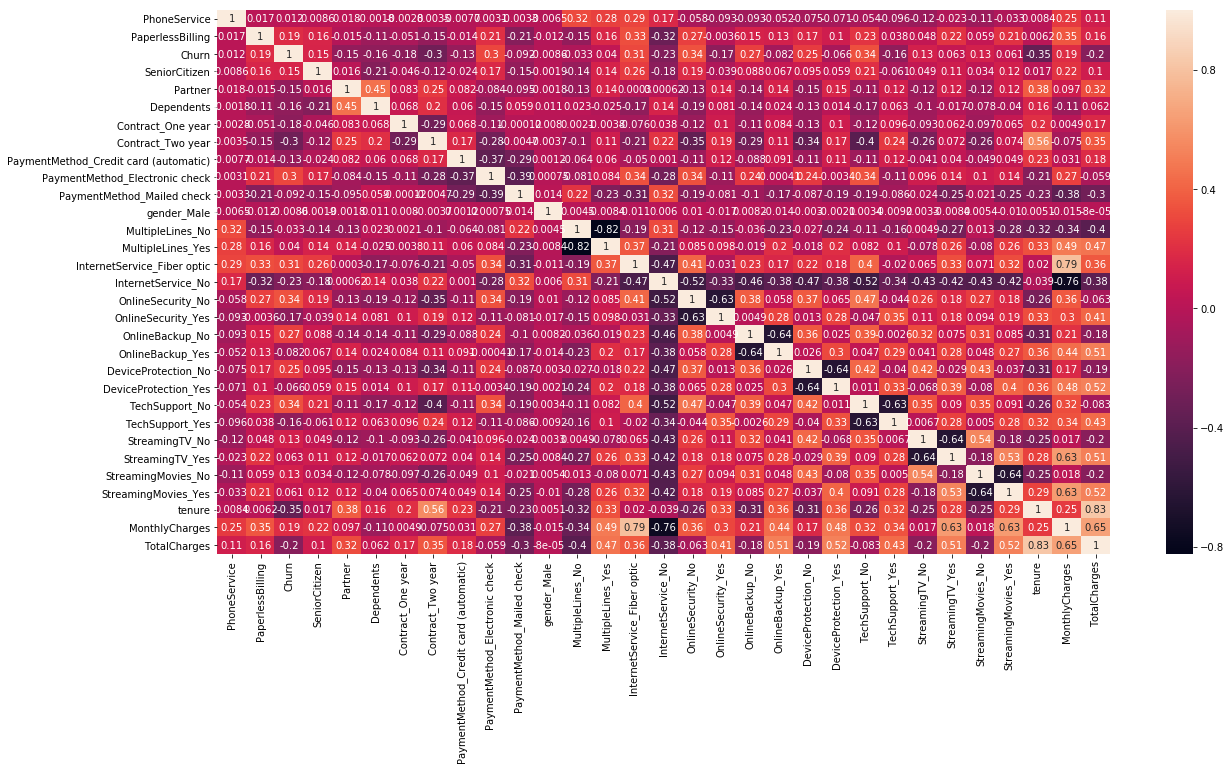

In [37]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(telecom.corr(),annot = True)

### Dropping highly correlated variables.

In [38]:
X_test2 = X_test.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)
X_train2 = X_train.drop(['MultipleLines_No','OnlineSecurity_No','OnlineBackup_No','DeviceProtection_No','TechSupport_No','StreamingTV_No','StreamingMovies_No'],1)

### Checking the Correlation Matrix

After dropping highly correlated variables now let's check the correlation matrix again.

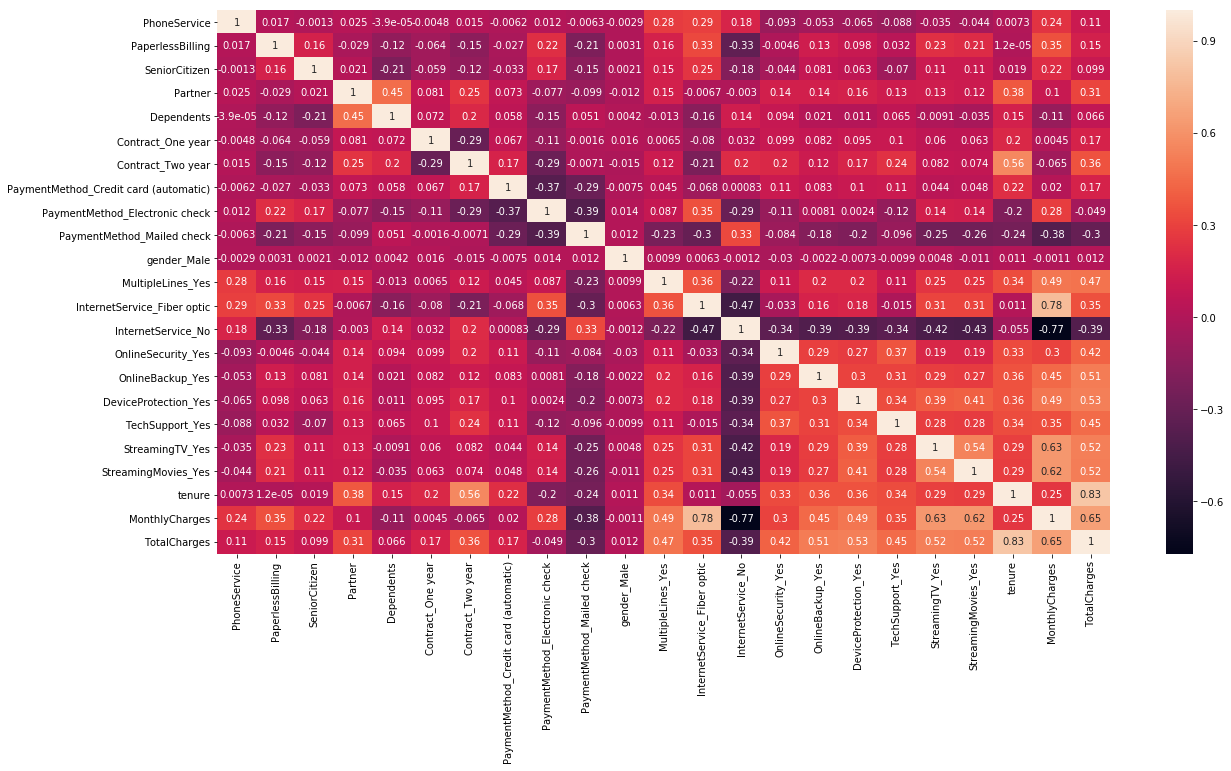

In [39]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train2.corr(),annot = True)

### Re-Running the Model

Now let's run our model again after dropping highly correlated variables

In [40]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train2)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.0
Date:                Sat, 09 May 2020   Deviance:                       4016.1
Time:                        01:59:30   Pearson chi2:                 5.77e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.9956      1.540     -1.945      0.052      -6.013       0.022
PhoneService                              0.4097      0.786      0.521      0.602      -1.131       1.950
PaperlessBilling                          0.3453      0.090      3.828      0.000       0.169       0.522
SeniorCitizen                             0.2950      0.103      2.877      0.004       0.094       0.496
Partner                                   0.0272      0.094      0.289      0.772      -0.157       0.212
Dependents                               -0.2207      0.108     -2.049      0.040      -0.432      -0.010
Contract_One year                        -0.6736      0.129     -5.205      0.000      -0.927      -0.420
Contract_Two year                        -1.3372      0.207     -6.452      0.000      -1.743      -0.931
PaymentMethod_Credit card (automatic)    -0.1531      0.138     -1.108      0.268      -0.424       0.118
PaymentMethod_Electronic check            0.2733      0.114      2.396      0.017       0.050       0.497
PaymentMethod_Mailed check               -0.0916      0.139     -0.660      0.509      -0.364       0.180
gender_Male                              -0.0411      0.078     -0.525      0.600      -0.195       0.112
MultipleLines_Yes                         0.5539      0.215      2.577      0.010       0.133       0.975
InternetService_Fiber optic               2.0221      0.967      2.091      0.037       0.127       3.917
InternetService_No                       -2.1794      0.977     -2.231      0.026      -4.094      -0.264
OnlineSecurity_Yes                       -0.0429      0.217     -0.198      0.843      -0.467       0.382
OnlineBackup_Yes                         -0.0206      0.211     -0.097      0.922      -0.435       0.394
DeviceProtection_Yes                      0.2014      0.213      0.944      0.345      -0.217       0.620
TechSupport_Yes                          -0.2538      0.219     -1.159      0.247      -0.683       0.175
StreamingTV_Yes                           0.7001      0.397      1.764      0.078      -0.078       1.478
StreamingMovies_Yes                       0.6689      0.396      1.688      0.091      -0.108       1.445
tenure                                   -1.3435      0.179     -7.500      0.000      -1.695      -0.992
MonthlyCharges                           -1.5285      1.158     -1.320      0.187      -3.799       0.742
TotalCharges                              0.6110      0.190      3.215      0.001       0.239       0.984
=========================================================================================================
"""

### Feature Selection Using RFE

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X,y)
print(rfe.support_)           # Printing the boolean results
print(rfe.ranking_)           # Printing the ranking

C:\Users\Aarav\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Aarav\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-reg

[False  True False False False  True  True False  True False False  True
 False  True  True  True False False False False False False False False
  True False  True  True  True  True]
[ 5  1  3 18  4  1  1 11  1 12 17  1 16  1  1  1  7  6 15  9 10  2  8 14
  1 13  1  1  1  1]


In [42]:
# Variables selected by RFE 
col = X_train.columns[rfe.support_]
print(col)
#col = ['PhoneService', 'PaperlessBilling', 'Contract_One year', 'Contract_Two year',
    #   'PaymentMethod_Electronic check','MultipleLines_No','InternetService_Fiber optic', 'InternetService_No',
   #    'OnlineSecurity_Yes','TechSupport_Yes','StreamingMovies_No','tenure','TotalCharges']

Index(['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')


In [43]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
#Comparing the model with StatsModels
logm3 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
logm3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2027.8
Date:                Sat, 09 May 2020   Deviance:                       4055.7
Time:                        02:01:21   Pearson chi2:                 5.92e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -2.2370      0.161    -13.925      0.000      -2.552      -1.922
PaperlessBilling                   0.3657      0.089      4.089      0.000       0.190       0.541
Contract_One year                 -0.7690      0.127     -6.047      0.000      -1.018      -0.520
Contract_Two year                 -1.5142      0.204     -7.432      0.000      -1.913      -1.115
PaymentMethod_Electronic check     0.3853      0.083      4.648      0.000       0.223       0.548
MultipleLines_No                  -0.3909      0.087     -4.495      0.000      -0.561      -0.220
InternetService_Fiber optic        1.5942      0.206      7.738      0.000       1.190       1.998
InternetService_No                -1.1384      0.232     -4.912      0.000      -1.593      -0.684
OnlineSecurity_No                  0.2105      0.106      1.992      0.046       0.003       0.418
StreamingTV_Yes                    0.4224      0.112      3.775      0.000       0.203       0.642
StreamingMovies_Yes                0.4121      0.110      3.755      0.000       0.197       0.627
tenure                            -1.3312      0.176     -7.574      0.000      -1.676      -0.987
MonthlyCharges                    -0.7538      0.177     -4.248      0.000      -1.102      -0.406
TotalCharges                       0.5842      0.188      3.104      0.002       0.215       0.953
==================================================================================================
"""

In [45]:
# UDF for calculating vif value to check if any multicollinearity happening here
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

In [46]:
telecom.columns
['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'tenure',
       'MonthlyCharges', 'TotalCharges']

['PaperlessBilling',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'MultipleLines_No',
 'InternetService_Fiber optic',
 'InternetService_No',
 'OnlineSecurity_No',
 'StreamingTV_Yes',
 'StreamingMovies_Yes',
 'tenure',
 'MonthlyCharges',
 'TotalCharges']

In [47]:
# Calculating Vif value
vif_cal(input_data=telecom.drop(['customerID','PhoneService','SeniorCitizen', 'Partner', 'Dependents',
                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_Yes','OnlineBackup_No',
                                 'OnlineBackup_Yes', 'TechSupport_Yes','TechSupport_No' , 'DeviceProtection_No', 
                                 'DeviceProtection_Yes','StreamingTV_No','StreamingMovies_No'],
                                axis=1), dependent_col='Churn')

,Var,Vif
11,MonthlyCharges,16.32
12,TotalCharges,10.09
10,tenure,6.86
0,PaperlessBilling,2.66
6,InternetService_No,1.06
2,Contract_Two year,0.25
1,Contract_One year,0.23
9,StreamingMovies_Yes,0.19
7,OnlineSecurity_No,0.18
8,StreamingTV_Yes,0.17


### Dropping Variable with high VIF

The variable Monthly charges has high VIF, but probability is low . Hence we will not drop the feature.

In [ ]:
#col=col.drop('MonthlyCharges')
#print(col)

In [ ]:
#col = ['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'tenure',
       'TotalCharges']

In [ ]:
#logm4 = sm.GLM(y_train,(sm.add_constant(X_train[col])), family = sm.families.Binomial())
#logm4.fit().summary()

In [ ]:
# Calculating Vif value
#vif_cal(input_data=telecom.drop(['customerID','PhoneService','SeniorCitizen', 'Partner', 'Dependents',
#                                 'PaymentMethod_Credit card (automatic)','PaymentMethod_Mailed check',
#                                 'gender_Male','MultipleLines_Yes','OnlineSecurity_Yes','OnlineBackup_No',
#                                 'OnlineBackup_Yes', 'TechSupport_Yes','TechSupport_No' , 'DeviceProtection_No', 
#                                 'DeviceProtection_Yes','StreamingTV_No','StreamingMovies_No'], axis=1), dependent_col='Churn')

In [49]:
col=['PaperlessBilling', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'MultipleLines_No',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'tenure',
       'MonthlyCharges', 'TotalCharges']

In [50]:
# Let's run the model using the selected variables
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Making Predictions

In [53]:
# Predicted probabilities of churn
y_pred = logsk.predict_proba(X_test[col])

In [54]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [55]:
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

In [56]:
# Let's see the head
y_pred_1.head()

,1
0,0.004951
1,0.001758
2,0.014619
3,0.006027
4,0.141432


In [57]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [58]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [59]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [60]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)

In [61]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'Churn_Prob'})

In [63]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['CustID','Churn','Churn_Prob'], axis=1)

In [68]:
# Let's see the head of y_pred_final
y_pred_final.head(50)

,CustID,Churn,Churn_Prob
0,4880,0,0.004951
1,1541,0,0.001758
2,1289,0,0.014619
3,5745,0,0.006027
4,4873,0,0.141432
5,4168,0,0.026325
6,1557,0,0.318398
7,2892,0,0.175659
8,664,0,0.003613
9,1588,0,0.304339


In [69]:
# Creating new column 'predicted' with 1 if Churn_Prob>0.5 else 0
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [70]:
# Let's see the head
y_pred_final.head(50)

,CustID,Churn,Churn_Prob,predicted
0,4880,0,0.004951,0
1,1541,0,0.001758,0
2,1289,0,0.014619,0
3,5745,0,0.006027,0
4,4873,0,0.141432,0
5,4168,0,0.026325,0
6,1557,0,0.318398,0
7,2892,0,0.175659,0
8,664,0,0.003613,0
9,1588,0,0.304339,0


### Model Evaluation

In [71]:
from sklearn import metrics

In [73]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1367,  180],
       [ 257,  309]], dtype=int64)

In [ ]:
# Predicted     not_churn    churn
# Actual
# not_churn        1326      166
# churn            249       333  

In [74]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.predicted)

0.7931850449597728

In [75]:
TP = confusion[0,0] # true positive 
TN = confusion[1,1] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [76]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8417487684729064

In [77]:
# Let us calculate specificity
TN / float(TN+FP)

0.6319018404907976

In [78]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.36809815950920244


In [79]:
# positive predictive value 
print (TP / float(TP+FP))

0.8836457659987071


In [80]:
# Negative predictive value
print (TN / float(TN+ FN))

0.5459363957597173


### ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

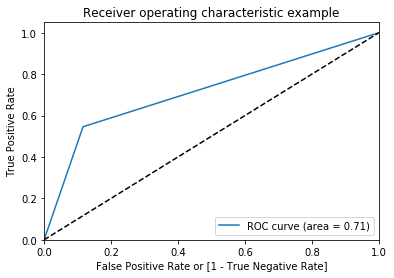

(array([0.        , 0.11635423, 1.        ]),
 array([0.       , 0.5459364, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [82]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [83]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,4880,0,0.004951,0,1,0,0,0,0,0,0,0,0,0
1,1541,0,0.001758,0,1,0,0,0,0,0,0,0,0,0
2,1289,0,0.014619,0,1,0,0,0,0,0,0,0,0,0
3,5745,0,0.006027,0,1,0,0,0,0,0,0,0,0,0
4,4873,0,0.141432,0,1,1,0,0,0,0,0,0,0,0


In [84]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.267866  0.000000  1.000000
0.1   0.1  0.598202  0.468649  0.952297
0.2   0.2  0.692854  0.631545  0.860424
0.3   0.3  0.743019  0.740789  0.749117
0.4   0.4  0.772362  0.821590  0.637809
0.5   0.5  0.793185  0.883646  0.545936
0.6   0.6  0.788926  0.934712  0.390459
0.7   0.7  0.767629  0.978022  0.192580
0.8   0.8  0.734027  0.999354  0.008834
0.9   0.9  0.732134  1.000000  0.000000


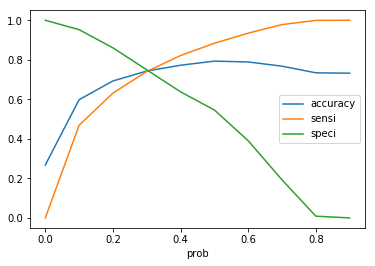

In [85]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [86]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.3 else 0)

In [87]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,4880,0,0.004951,0,1,0,0,0,0,0,0,0,0,0,0
1,1541,0,0.001758,0,1,0,0,0,0,0,0,0,0,0,0
2,1289,0,0.014619,0,1,0,0,0,0,0,0,0,0,0,0
3,5745,0,0.006027,0,1,0,0,0,0,0,0,0,0,0,0
4,4873,0,0.141432,0,1,1,0,0,0,0,0,0,0,0,0


In [88]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7430194036914339

In [89]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1146,  401],
       [ 142,  424]], dtype=int64)